## 付録B：典型的な最適化問題

| **典型問題クラス**           | **典型問題**               | **複雑性クラス** | **関数**                 |
| ---------------------------- | -------------------------- | ---------------- | ------------------------ |
| **グラフ・ネットワーク問題** | 最小全域木問題             | P                | nx.minimum_spanning_tree |
| -                            | 最大安定集合問題           | NP困難           | ot.maximum_stable_set    |
| -                            | 最大カット問題             | NP困難           | ot.maximum_cut           |
| -                            | 最短路問題                 | P                | nx.dijkstra_path         |
| -                            | 最大流問題                 | P                | nx.maximum_flow          |
| -                            | 最小費用流問題             | P                | nx.min_cost_flow         |
| **経路問題**                 | 運搬経路（配送最適化）問題 | NP困難           | ot.vrp                   |
| -                            | 巡回セールスマン問題       | NP困難           | ot.tsp                   |
| -                            | 中国人郵便配達問題         | P                | ot.chinese_postman       |
| **集合被覆・分割問題**       | 集合被覆問題               | NP困難           | ot.set_covering          |
| -                            | 集合分割問題               | NP困難           | ot.set_partition         |
| -                            | 組合せオークション問題     | NP困難           | ot.combinatorial_auction |
| **スケジューリング問題**     | ジョブショップ問題         | NP困難           | ot.two_machine_flowshop  |
| -                            | 勤務スケジューリング問題   | NP困難           | ot.shift_scheduling      |
| **切出し・詰込み問題**       | ナップサック問題           | NP困難           | ot.knapsack              |
| -                            | ビンパッキング問題         | NP困難           | ot.binpacking            |
| -                            | n次元パッキング問題        | NP困難           | ot.TwoDimPackingClass    |
| **配置問題**                 | 施設配置問題               | NP困難           | ot.facility_location     |
| -                            | 容量制約なし施設配置問題   | NP困難           | ot.facility_location_without_capacity |
| **割当・マッチング問題**     | 2次割当問題                | NP困難           | ot.quad_assign           |
| -                            | 一般化割当問題             | NP困難           | ot.gap                   |
| -                            | 最大マッチング問題         | P                | nx.max_weight_matching   |
| -                            | 重みマッチング問題         | P                | nx.max_weight_matching   |
| -                            | 安定マッチング問題         | (P)              | ot.stable_matching       |

nxはnetworkxをotはortoolpyを表す。

---

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 5, 2

### 最小全域木問題

/Users/knt/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


[(0, 1), (0, 3), (0, 4), (2, 3), (4, 5)]


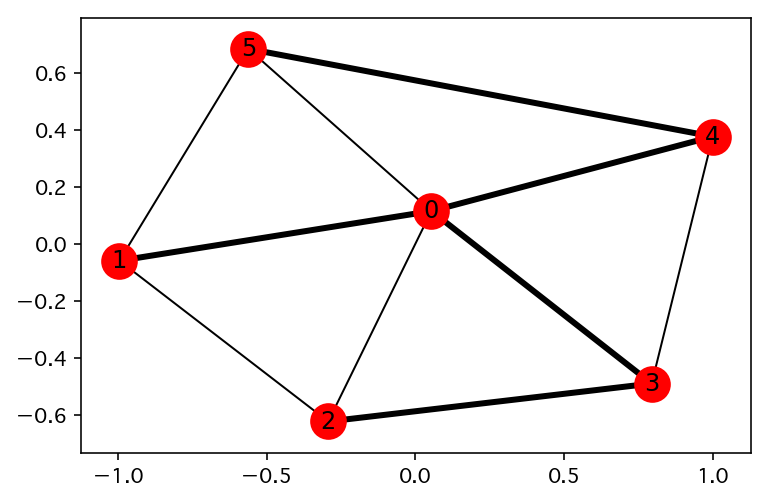

In [2]:
#%matplotlib inline
import pandas as pd, networkx as nx
from ortoolpy import graph_from_table
tbn = pd.read_csv('data/node0.csv')
tbe = pd.read_csv('data/edge0.csv')
g = graph_from_table(tbn, tbe)[0]
t = nx.minimum_spanning_tree(g)
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos)
nx.draw_networkx_edges(t, pos, width=3)
print(t.edges())

In [3]:
from ortoolpy.optimization import MinimumSpanningTree
MinimumSpanningTree('data/edge0.csv')

,node1,node2,capacity,weight
0,0,1,2,1
1,0,3,2,2
2,0,4,2,2
3,2,3,2,3
4,4,5,2,1


### 最大安定集合問題

/Users/knt/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


(5.0, [1, 4])


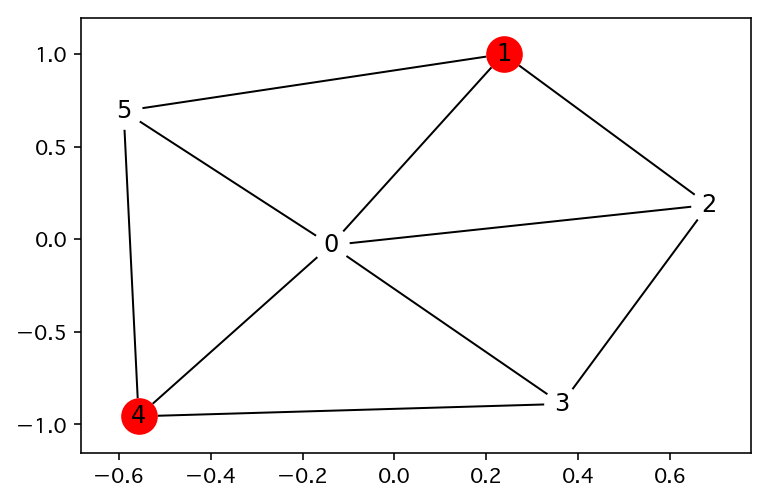

In [4]:
#%matplotlib inline
import pandas as pd, networkx as nx
from ortoolpy import graph_from_table, maximum_stable_set
tbn = pd.read_csv('data/node0.csv')
tbe = pd.read_csv('data/edge0.csv')
g = graph_from_table(tbn, tbe)[0]
t = maximum_stable_set(g)
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos, node_color='white')
nx.draw_networkx_nodes(g, pos, nodelist=t[1])
print(t)

In [5]:
from ortoolpy.optimization import MaximumStableSet
MaximumStableSet('data/node0.csv','data/edge0.csv')

,id,x,y,demand,weight
1,1,5,8,1,3
4,4,2,2,1,2


### 最大カット問題

/Users/knt/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


(27.0, [2, 4, 5])


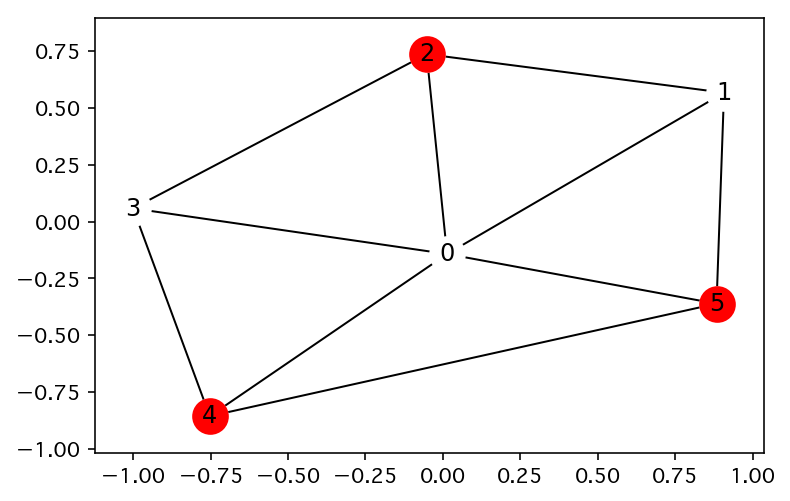

In [6]:
#%matplotlib inline
import pandas as pd, networkx as nx
from ortoolpy import graph_from_table, maximum_cut
tbn = pd.read_csv('data/node0.csv')
tbe = pd.read_csv('data/edge0.csv')
g = graph_from_table(tbn, tbe)[0]
t = maximum_cut(g)
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos, node_color='white')
nx.draw_networkx_nodes(g, pos, nodelist=t[1])
print(t)

In [7]:
from ortoolpy.optimization import MaximumCut
MaximumCut('data/node0.csv','data/edge0.csv')[1]

,id,x,y,demand,weight
2,2,10,5,0,1
4,4,2,2,1,2
5,5,0,5,1,1


### 最短路問題

In [8]:
import pandas as pd, networkx as nx
from ortoolpy import graph_from_table
tbn = pd.read_csv('data/node0.csv')
tbe = pd.read_csv('data/edge0.csv')
g = graph_from_table(tbn, tbe)[0]
print(nx.dijkstra_path(g, 5, 2))

[5, 4, 0, 2]


In [9]:
from ortoolpy.optimization import DijkstraPath
DijkstraPath('data/edge0.csv', 5, 2)

,node1,node2,capacity,weight
9,4,5,2,1
3,0,4,2,2
1,0,2,2,4


### 最大流問題

(0, 2) 2
(0, 3) 2
(1, 2) 2
(3, 2) 2
(4, 0) 2
(5, 0) 2
(5, 1) 2
(5, 4) 2


/Users/knt/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


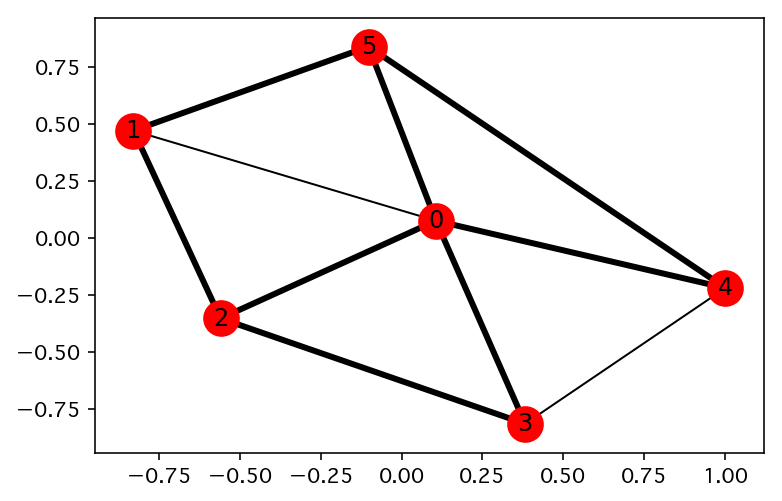

In [10]:
#%matplotlib inline
import pandas as pd, networkx as nx
from ortoolpy import graph_from_table
tbn = pd.read_csv('data/node0.csv')
tbe = pd.read_csv('data/edge0.csv')
g = graph_from_table(tbn, tbe)[0]
t = nx.maximum_flow(g, 5, 2)
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos)
nx.draw_networkx_edges(g, pos, width=3, edgelist=[(k1, k2)
    for k1, d in t[1].items() for k2, v in d.items() if v])
for i, d in t[1].items():
    for j, f in d.items():
        if f: print((i, j), f)

In [11]:
from ortoolpy.optimization import MaximumFlow
MaximumFlow('data/edge0.csv', 5, 2)[1]

,node1,node2,capacity,weight,flow
0,0,2,2,4,2
1,0,3,2,2,2
2,0,4,2,2,2
3,0,5,2,4,2
4,1,2,2,5,2
5,1,5,2,5,2
6,2,3,2,3,2
7,4,5,2,1,2


### 最小費用流問題

In [12]:
import pandas as pd, networkx as nx
from ortoolpy import graph_from_table
tbn = pd.read_csv('data/node0.csv')
tbe = pd.read_csv('data/edge0.csv')
g = graph_from_table(tbn, tbe, directed=True)[0]
result = nx.min_cost_flow(g)
for i, d in result.items():
    for j, f in d.items():
        if f: print((i, j), f)

(0, 1) 1
(0, 3) 1
(0, 4) 2
(4, 5) 1


In [13]:
from ortoolpy.optimization import MinCostFlow
MinCostFlow('data/node0.csv','data/edge0.csv')

,node1,node2,capacity,weight,flow
0,0,1,2,1,1
1,0,3,2,2,1
2,0,4,2,2,2
3,4,5,2,1,1


### 運搬経路（配送最適化）問題

[[(0, 1), (1, 4), (4, 0)], [(0, 3), (2, 0), (3, 5), (5, 2)]]


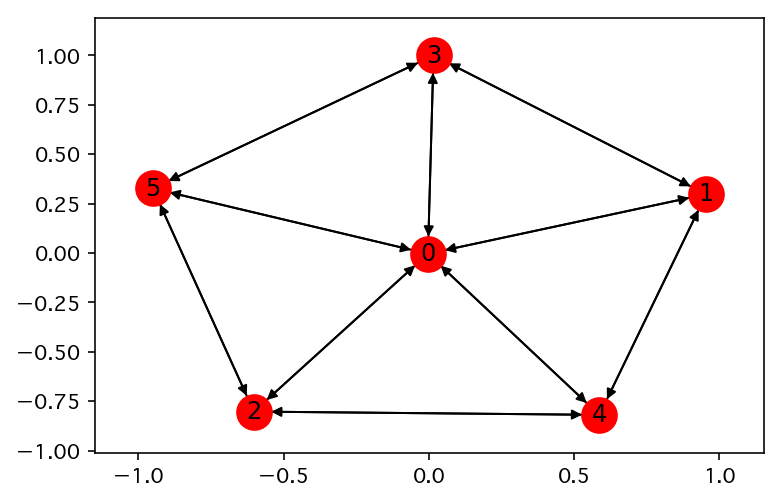

In [14]:
#%matplotlib inline
import pandas as pd, networkx as nx
from ortoolpy import vrp, graph_from_table
tbn = pd.read_csv('data/node1.csv')
tbe = pd.read_csv('data/edge1.csv')
g = graph_from_table(tbn, tbe)[0].to_directed()
nx.draw_networkx(g)
nv, capa = 2, 3 # 車両数、車両容量
print(vrp(g, nv, capa))

In [15]:
from ortoolpy.optimization import Vrp
Vrp('data/node1.csv','data/edge1.csv',2,3)

,car,num,node1,node2,cost
0,0,0,0,1,10
1,0,1,4,1,1
2,0,2,0,4,10
3,1,0,0,3,10
4,1,1,0,2,10
5,1,2,3,5,1
6,1,3,5,2,1


### 巡回セールスマン問題

In [16]:
from ortoolpy import tsp
tsp([(2, 0), (1, 2), (0, 1), (3, 1), (2, 2)])[1]

[0, 2, 1, 4, 3]

In [17]:
from ortoolpy.optimization import Tsp
Tsp('data/node1.csv')[1]

,id,x,y,demand
0,0,5,1,0
4,4,8,0,1
1,1,8,5,1
2,2,1,5,1
5,5,0,4,1
3,3,1,0,1


### 中国人郵便配達問題

/Users/knt/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


(36, [(0, 4), (4, 5), (5, 4), (4, 3), (3, 2), (2, 3), (3, 0), (0, 5), (5, 1), (1, 2), (2, 0), (0, 1), (1, 0)])


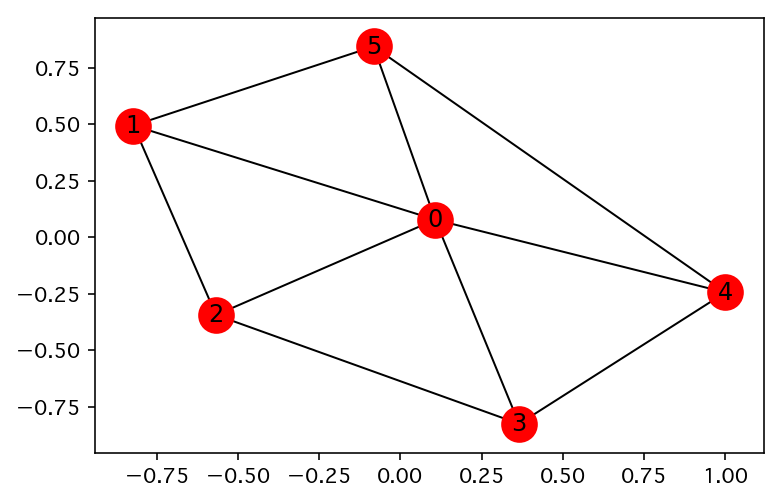

In [18]:
#%matplotlib inline
import pandas as pd, networkx as nx
from ortoolpy import chinese_postman, graph_from_table
tbn = pd.read_csv('data/node0.csv')
tbe = pd.read_csv('data/edge0.csv')
g = graph_from_table(tbn, tbe, multi=True)[0]
nx.draw_networkx(g)
print(chinese_postman(g))

In [19]:
from ortoolpy.optimization import ChinesePostman
ChinesePostman('data/edge0.csv')[1]

,node1,node2,capacity,weight
0,0,4,2,2
1,4,5,2,1
2,4,5,2,1
3,3,4,2,4
4,2,3,2,3
5,2,3,2,3
6,0,3,2,2
7,0,5,2,4
8,1,5,2,5
9,1,2,2,5


### 集合被覆問題

In [20]:
import pandas as pd
from ortoolpy import set_covering
ss = pd.read_csv('data/subset.csv')
g = ss.groupby('id')
set_covering(len(g), [(r.weight.iloc[0], r.element.tolist())
                      for _, r in g])

[0, 1, 2]

In [21]:
from ortoolpy.optimization import SetCovering
SetCovering('data/subset.csv')

,id,weight,element
0,0,1.0,a
1,0,NaN,b
2,1,1.0,a
3,1,NaN,c
4,2,1.0,a
5,2,NaN,d


### 集合分割問題

In [22]:
import pandas as pd
from ortoolpy import set_partition
ss = pd.read_csv('data/subset.csv')
g = ss.groupby('id')
set_partition(len(g), [(r.weight.iloc[0],r.element.tolist())
                       for _, r in g])

[2, 3]

In [23]:
from ortoolpy.optimization import SetPartition
SetPartition('data/subset.csv')

,id,weight,element
4,2,1.0,a
5,2,NaN,d
6,3,3.0,b
7,3,NaN,c


### 組合せオークション問題

In [24]:
from ortoolpy import combinatorial_auction
cand = [
    ( 15, (0,2), 0),
    ( 10, (0,), 1),
    (  8, (1,), 1),
    ( 14, (1,2), 2),
]
combinatorial_auction(3, cand)

[1, 3]

In [25]:
# 1人で無制限に購入可能な場合
from ortoolpy.optimization import CombinatorialAuction
CombinatorialAuction('data/auction.csv')

,id,price,element,buyer
2,1,10.0,a,1
4,3,14.0,b,1
5,3,NaN,c,1


In [26]:
# 1人、1個まで購入可能な場合
from ortoolpy.optimization import CombinatorialAuction
CombinatorialAuction('data/auction.csv', limit=1)

,id,price,element,buyer
0,0,15.0,a,0
1,0,NaN,c,0
3,2,8.0,b,2


### ジョブショップ問題

In [27]:
from ortoolpy import two_machine_flowshop
two_machine_flowshop([(4, 3), (3, 1), (1, 4)])

(9, [2, 0, 1])

In [28]:
from ortoolpy.optimization import TwoMachineFlowshop
TwoMachineFlowshop('data/flowshop.csv')[1]

,first,second
2,1,4
0,4,3
1,3,1


### 勤務スケジューリング問題

In [29]:
from ortoolpy import shift_scheduling
ndy, nst = 8, 4
shift = '休日夜'
proh = ['夜夜', '夜日', '日日日']
need = {'日':[2] * 8, '夜':[1] * 8}
r = shift_scheduling(ndy, nst, shift, proh, need)
print(r)

import numpy as np, pandas as pd
a = pd.DataFrame(np.vectorize(lambda i: shift[i])(r),
    columns=[chr(65+i) for i in range(nst)],
    index=['%d日目'%i for i in range(1,ndy+1)])
for sft,lst in need.items():
    a['%s必要'%sft] = lst
    a['%s計画'%sft] = (a.iloc[:,:4]==sft).sum(1)
print(a)

[[1, 2, 0, 1], [2, 0, 1, 1], [0, 1, 1, 2], [1, 1, 2, 0], [1, 2, 0, 1], [2, 0, 1, 1], [0, 1, 1, 2], [1, 1, 2, 0]]
     A  B  C  D  日必要  日計画  夜必要  夜計画
1日目  日  夜  休  日    2    2    1    1
2日目  夜  休  日  日    2    2    1    1
3日目  休  日  日  夜    2    2    1    1
4日目  日  日  夜  休    2    2    1    1
5日目  日  夜  休  日    2    2    1    1
6日目  夜  休  日  日    2    2    1    1
7日目  休  日  日  夜    2    2    1    1
8日目  日  日  夜  休    2    2    1    1


In [30]:
from ortoolpy.optimization import ShiftScheduling
ShiftScheduling(8, 4, '休日夜', ['夜夜','夜日','日日日'],
                {'日':[2]*8, '夜':[1]*8})

,A,B,C,D,日必要,日計画,夜必要,夜計画
1日目,日,夜,休,日,2,2,1,1
2日目,夜,休,日,日,2,2,1,1
3日目,休,日,日,夜,2,2,1,1
4日目,日,日,夜,休,2,2,1,1
5日目,日,夜,休,日,2,2,1,1
6日目,夜,休,日,日,2,2,1,1
7日目,休,日,日,夜,2,2,1,1
8日目,日,日,夜,休,2,2,1,1


### ナップサック問題

In [31]:
from ortoolpy import knapsack
size = [21, 11, 15, 9, 34, 25, 41, 52]  # 大きさ
weight = [22, 12, 16, 10, 35, 26, 42, 53]  # 価値
capacity = 100  # ナップサックの容量
print(knapsack(size, weight, capacity))

(105.0, [0, 1, 3, 4, 5])


In [32]:
from ortoolpy.optimization import Knapsack
Knapsack('data/knapsack.csv', 100)

,size,weight
0,21,22
1,11,12
3,9,10
4,34,35
5,25,26


### ビンパッキング問題

In [33]:
from ortoolpy import binpacking
binpacking(10, [4, 5, 3, 8, 7, 6, 2, 3])

[[8], [7, 3], [5, 3, 2], [4, 6]]

In [34]:
from ortoolpy.optimization import BinPacking
BinPacking('data/binpacking.csv', 10)

,id,size
0,0,8.0
1,1,7.0
2,1,3.0
3,2,5.0
4,2,3.0
5,2,2.0
6,3,4.0
7,3,6.0


### n次元パッキング問題

In [35]:
from ortoolpy import TwoDimPackingClass
TwoDimPackingClass(500, 300, [(240, 150), (260, 100),
    (100, 200), (240, 150), (160, 200)]).solve()

(1.0,
 [(0, 240, 150, 0, 0),
  (1, 260, 100, 240, 0),
  (4, 160, 200, 240, 100),
  (2, 100, 200, 400, 100),
  (3, 240, 150, 0, 150)])

In [36]:
from ortoolpy.optimization import TwoDimPacking
TwoDimPacking('data/tdpacking.csv', 500, 300)[1]

,width,height,x,y
0,240,150,0,0
1,260,100,240,0
4,160,200,240,100
2,100,200,400,100
3,240,150,0,150


### 施設配置問題

In [37]:
from ortoolpy import facility_location
facility_location(2, [(1, 0, 1), (0, 1, 1), (2, 2, 1)], 
                     [(1, 0, 1), (0, 1, 1), (2, 2, 2)])

[0, 2, 2]

In [38]:
from ortoolpy.optimization import FacilityLocation
FacilityLocation('data/facility.csv',2)

,x,y,demand,capacity,id
0,1,0,1.0,1.0,0.0
1,0,1,NaN,1.0,NaN
2,0,1,1.0,NaN,3.0
3,2,2,1.0,2.0,3.0


### 容量制約なし施設配置問題

In [39]:
from ortoolpy import facility_location_without_capacity
facility_location_without_capacity(2, [(1,0),(0,1),(2,2)])

[1, 1, 2]

In [40]:
from ortoolpy.optimization import (
    FacilityLocationWithoutCapacity)
FacilityLocationWithoutCapacity('data/facility.csv',2)

,x,y,demand,capacity,id
0,1,0,1.0,1.0,1.0
1,0,1,NaN,1.0,NaN
2,0,1,1.0,NaN,1.0
3,2,2,1.0,2.0,3.0


### 2次割当問題

In [41]:
from ortoolpy import quad_assign
quad_assign([[0, 2, 0], [0, 0, 1], [0, 0, 0]],
            [[0, 2, 4], [2, 0, 3], [4, 3, 0]])

(7, (0, 1, 2))

In [42]:
from ortoolpy.optimization import QuadAssign
QuadAssign('data/quad_assign_quant.csv',
           'data/quad_assign_dist.csv')[1]

,target,pos
0,0,0
1,1,1
2,2,2


### 一般化割当問題

In [43]:
from ortoolpy import gap
gap([[2, 2, 2], [1, 1, 1]], [[1, 1, 1], [1, 1, 1]], [2, 1])

[0, 0, 1]

In [44]:
from ortoolpy.optimization import Gap
Gap('data/gap.csv', [2,1])

,agent,job,cost,req
0,0,0,2,1
1,0,1,2,1
5,1,2,1,1


### 最大マッチング問題

/Users/knt/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{(1, 2), (0, 5), (3, 4)}


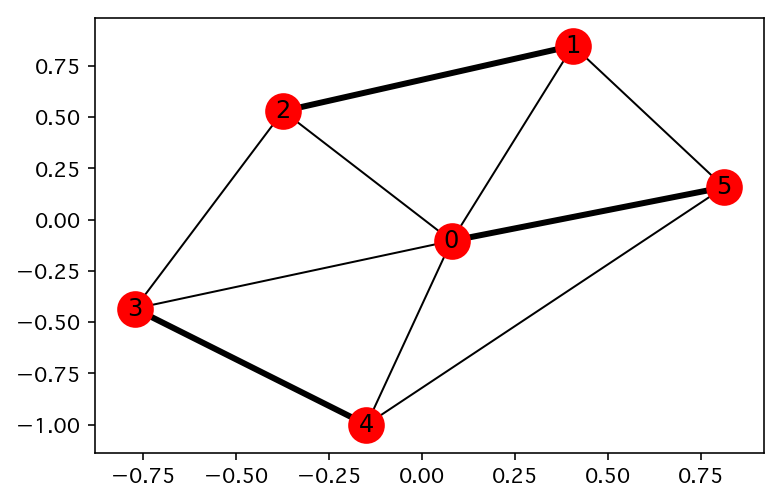

In [45]:
#%matplotlib inline
import pandas as pd, networkx as nx
from ortoolpy import graph_from_table
tbn = pd.read_csv('data/node0.csv')
tbe = pd.read_csv('data/edge0.csv')
g = graph_from_table(tbn, tbe)[0]
d = nx.max_weight_matching(g, weight='')
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos)
nx.draw_networkx_edges(g, pos, width=3,
    edgelist=[(i, j) for i, j in d])
print(d)

In [46]:
from ortoolpy.optimization import MaxMatching
MaxMatching('data/edge0.csv')

,node1,node2,capacity,weight
0,0,5,2,4
1,1,2,2,5
2,3,4,2,4


### 重みマッチング問題

/Users/knt/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{(1, 5), (3, 4), (0, 2)}


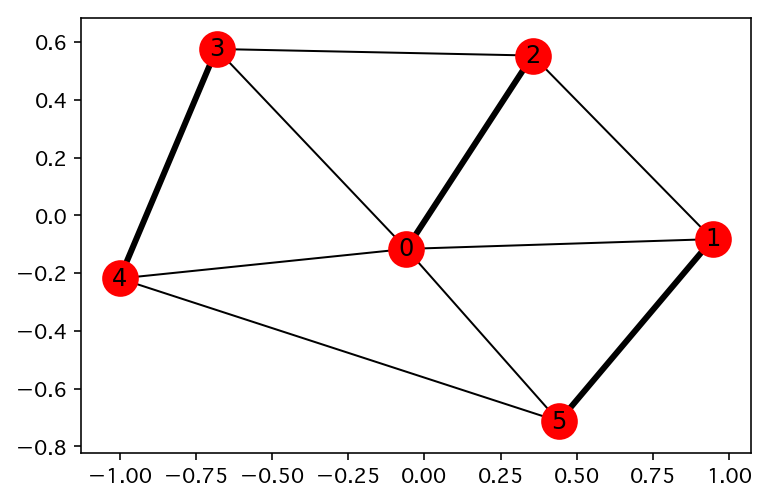

In [47]:
#%matplotlib inline
import pandas as pd, networkx as nx
from ortoolpy import graph_from_table
tbn = pd.read_csv('data/node0.csv')
tbe = pd.read_csv('data/edge0.csv')
g = graph_from_table(tbn, tbe)[0]
d = nx.max_weight_matching(g)
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos)
nx.draw_networkx_edges(g, pos, width=3,
    edgelist=[(i, j) for i, j in d])
print(d)

In [48]:
from ortoolpy.optimization import MaxWeightMatching
MaxWeightMatching('data/edge0.csv')

,node1,node2,capacity,weight
0,0,2,2,4
1,1,5,2,5
2,3,4,2,4


### 安定マッチング問題

In [49]:
from ortoolpy import stable_matching
print(stable_matching([[2,0,1],[2,1,0],[0,2,1]],
                      [[0,1,2],[2,0,1],[2,1,0]]))

{2: 2, 0: 0, 1: 1}


In [50]:
from ortoolpy.optimization import StableMatching
StableMatching('data/stable.csv')

,male,female,pref_male,pref_female
0,0,0,1,0
4,1,1,1,2
8,2,2,1,0
